In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


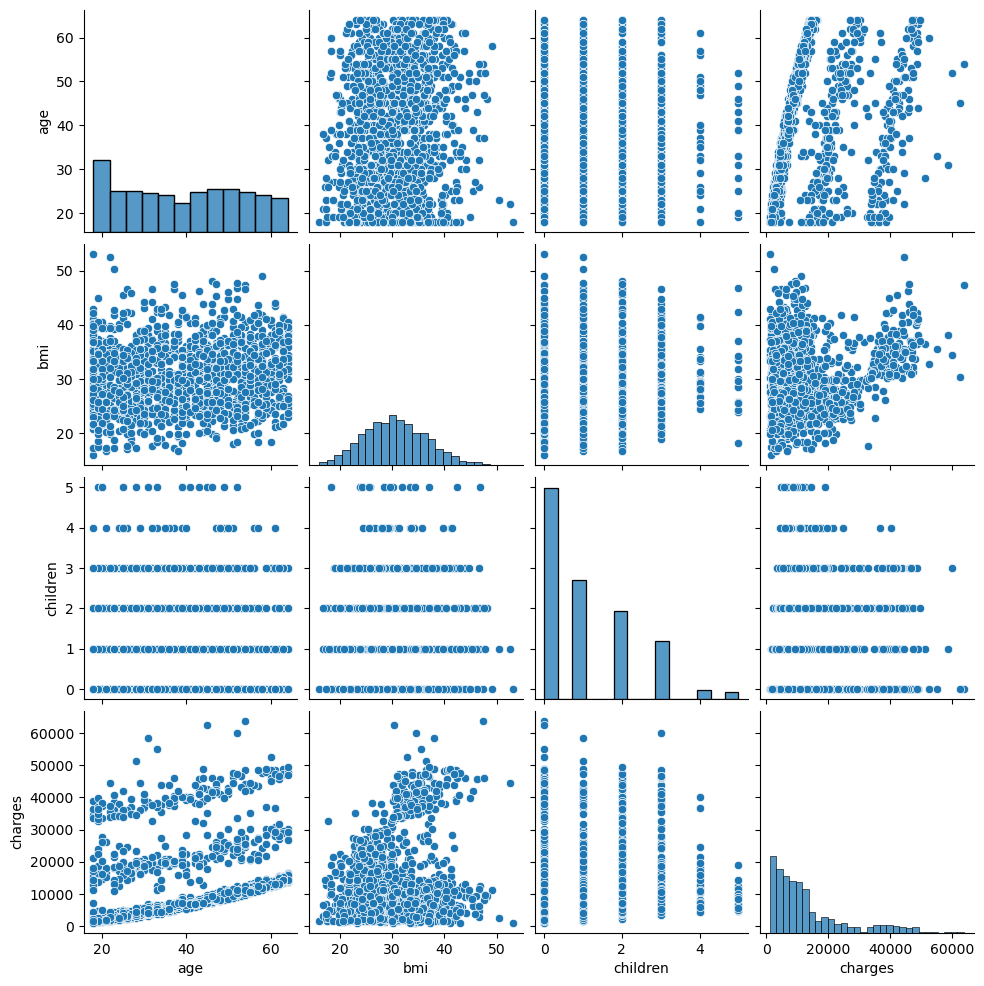

In [6]:
sns.pairplot(df)

In [7]:
df.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


<Axes: >

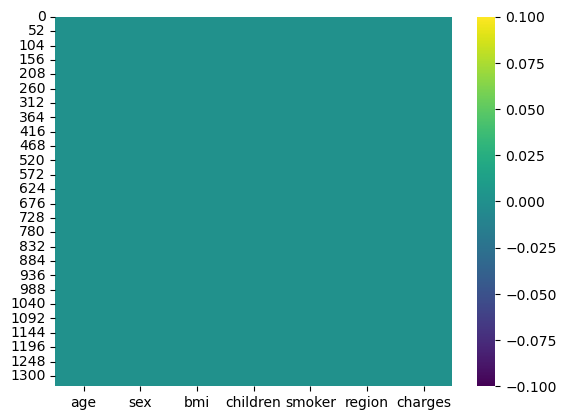

In [8]:
sns.heatmap(df.isnull(),cmap="viridis")

In [9]:
import cufflinks as cf
cf.go_offline()

c:\Users\Aman\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning:

Blowfish has been deprecated



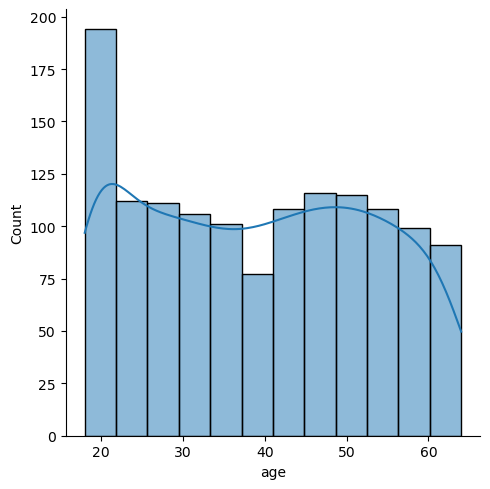

In [10]:
sns.displot(data=df,x="age",kde=True)

In [11]:
df["age"].iplot(kind="hist")

Text(0.5, 1.0, 'Gender Distribution')

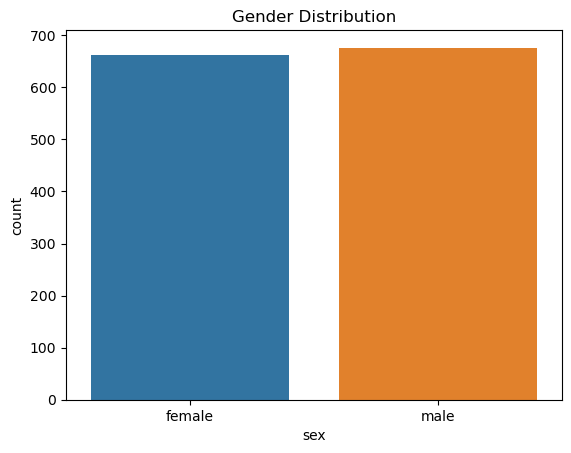

In [12]:
sns.countplot(data=df, x="sex")
plt.title("Gender Distribution")

In [13]:
df["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

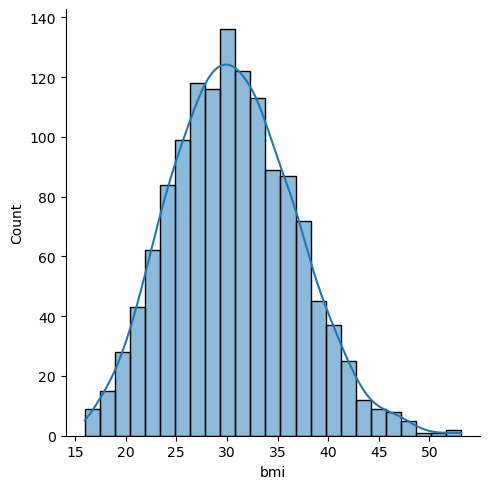

In [14]:
sns.displot(data=df, x="bmi", kde=True)

In [15]:
df["bmi"].iplot(kind="hist")

In [16]:
df["bmi"].mean()

30.66339686098655

<Axes: xlabel='children', ylabel='count'>

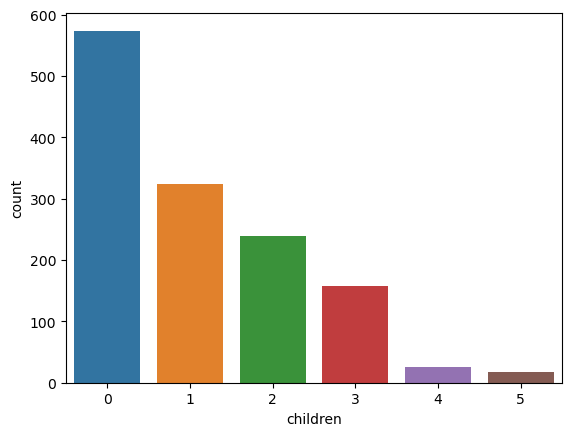

In [17]:
df["children"].value_counts()
sns.countplot(data=df, x="children")

In [18]:
df["children"].iplot(kind="hist")

<Axes: xlabel='smoker', ylabel='count'>

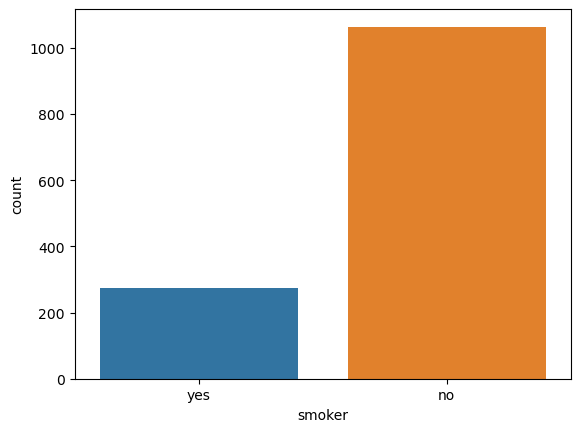

In [19]:
sns.countplot(data=df, x="smoker")

In [20]:
df["smoker"].iplot(kind="hist")

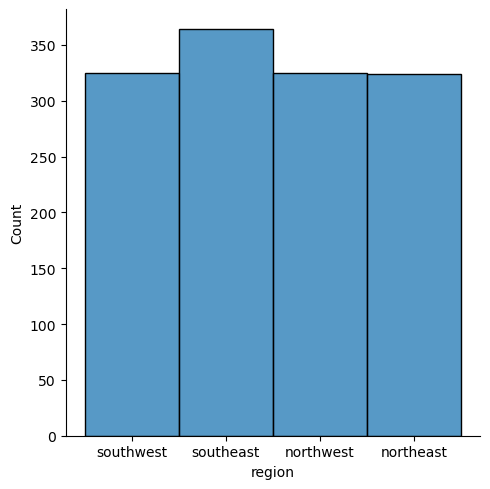

In [21]:
sns.displot(data=df, x="region")

In [22]:
df["region"].iplot(kind="hist")

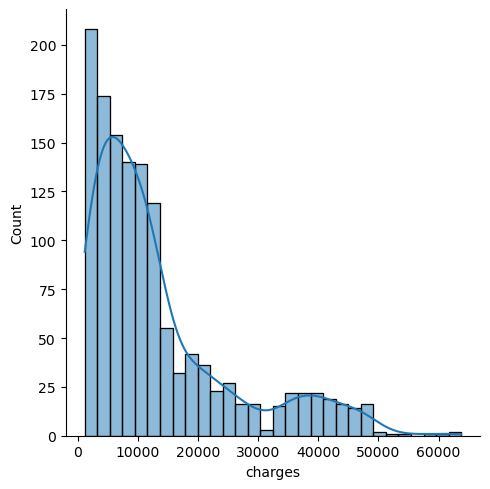

In [23]:
sns.displot(data=df, x="charges",kde=True)


In [24]:
df["charges"].mean()

13270.422265141257

In [25]:
df["charges"].iplot(kind="hist")

#ENCODING

In [26]:
df.replace({"sex":{'male':0, 'female':1}}, inplace=True)

In [27]:
df.replace({"smoker":{"yes":0,"no":1}}, inplace=True)

In [28]:
df.replace({"region":{"southeast":0, "southwest":1, "northeast":2, "northwest":3}}, inplace=True)

In [29]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


In [30]:
x= df.drop(columns="charges", axis=1)
y= df["charges"]

In [31]:
x

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [32]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

# ML 

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3) 

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
lm=LinearRegression()

In [37]:
lm.fit(x_train, y_train)

LinearRegression()

In [38]:
prediction=lm.predict(x_test)

In [39]:
lm.coef_


array([   273.22789704,    175.52824479,    307.3133259 ,    376.40030155,
       -24666.03646639,    200.13000514])

In [40]:
lm.intercept_

12061.576406749151

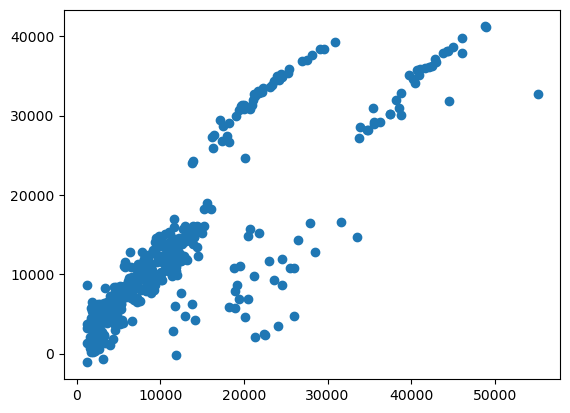

In [41]:
plt.scatter(y_test, prediction)

In [42]:
from sklearn import metrics

In [43]:
metrics.r2_score(y_test, prediction)

0.7049338768064588

In [44]:
metrics.mean_squared_error(y_test, prediction)

36177478.27610849

In [45]:
np.sqrt(metrics.mean_squared_error(y_test,prediction))

6014.771672815892

# BUILDING PREDICTIVE SYSTEM

In [46]:
input_data=(31,1,25,74,0,1)

data1=np.asarray(input_data)

In [47]:
data=data1.reshape(1,-1)

In [48]:
data

array([[31,  1, 25, 74,  0,  1]])

In [49]:
prediction=lm.predict(data)

c:\Users\Aman\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [50]:
prediction

array([56443.7549268])

#SAVING MODEL

In [51]:
import pickle

In [52]:
filename="insurance.sav"
pickle.dump(lm, open(filename,'wb'))